<a href="https://colab.research.google.com/github/Seavleu/fcc-MAGIC-SuperviseLearning/blob/main/seoul_bike_demand_SuperviseLearning_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression
Assumption:
- Linearity: does our data follow the pattern?
, independance, normality, nomoskedasticity

Predicting the output from the continous data

Key takeaway: Residual/Error |yi - yi^|: sum the error and try to decrease them

MAE: sum all the error then divided how many data point we have to get the average
MSE
RMSE  
R^2-coeff of determination
RSS
TSS

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
import copy
import seaborn as sns
import tensorflow as tf
from sklearn.linear_model import LinearRegression

# Dataset

The dataset contains count of public bicycles rented per hour in the Seoul Bike Sharing System, with corresponding weather data and holiday information

In [3]:
cols = ['bike_counts', 'hour', 'temp', 'humidity', 'wind', 'visibility', 'dew_pt_temp', 'rediation', 'rain', 'snow', 'functional']
df= pd.read_csv('/content/drive/MyDrive/Machine Learning 2024/Datasets/SeoulBikeData - SeoulBikeData.csv').drop(['Date', 'Holiday', 'Seasons'],axis =1)

In [4]:
df.columns = cols
df['functional'] = (df['functional'] == 'Yes').astype(int)
df = df[df['hour'] == 12]
df = df.drop(['hour'], axis=1)

In [5]:
df.head()

,bike_counts,temp,humidity,wind,visibility,dew_pt_temp,rediation,rain,snow,functional
12,449,1.7,23,1.4,2000,-17.2,1.11,0.0,0.0,1
36,479,4.3,41,1.3,1666,-7.8,1.09,0.0,0.0,1
60,333,5.8,85,1.7,349,3.4,0.43,0.0,0.0,1
84,393,-0.3,38,4.8,1823,-12.9,1.11,0.0,0.0,1
108,321,-2.3,25,0.0,1962,-19.7,0.00,0.0,0.0,1


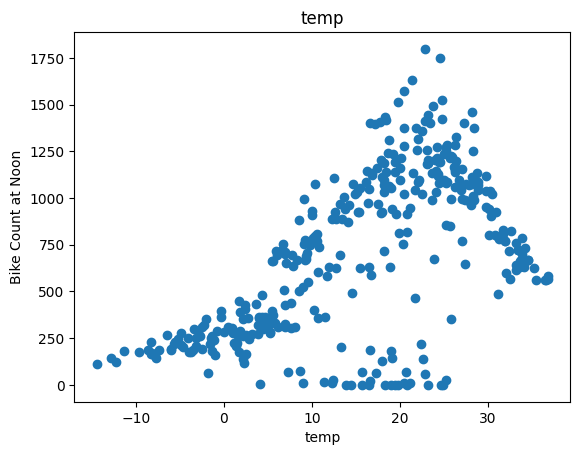

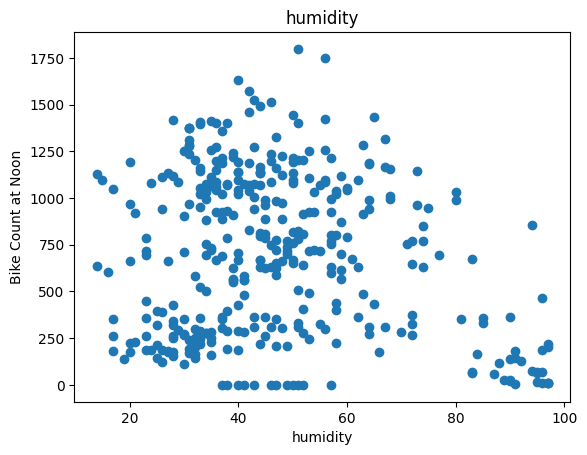

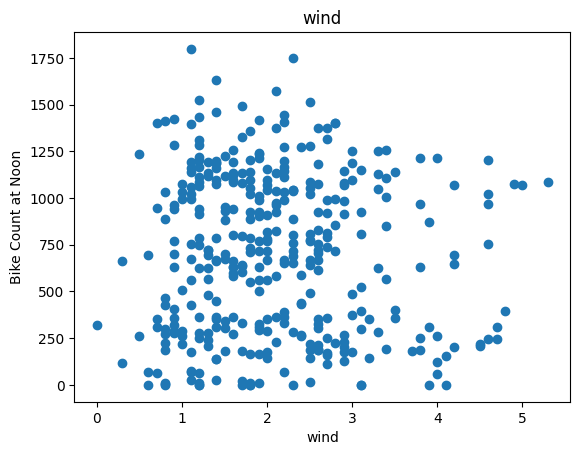

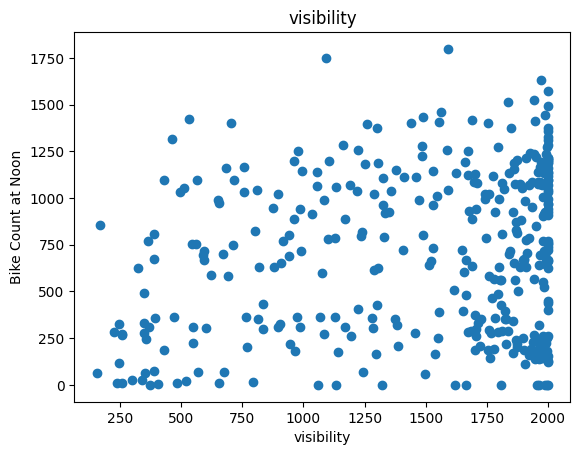

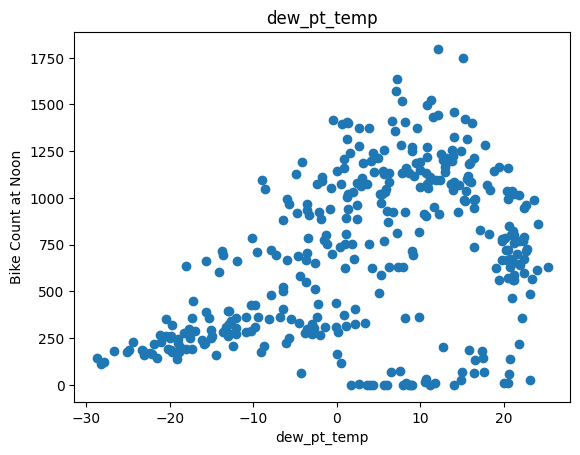

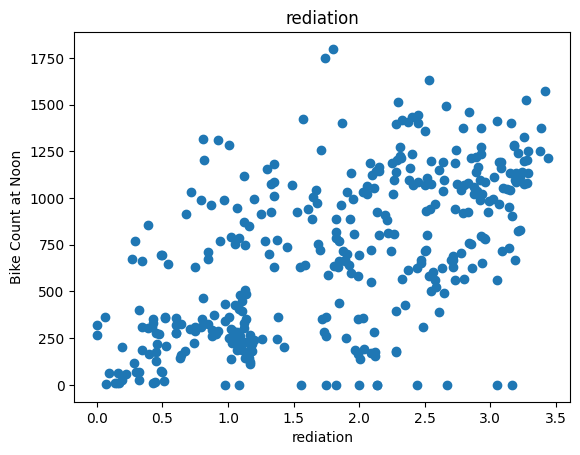

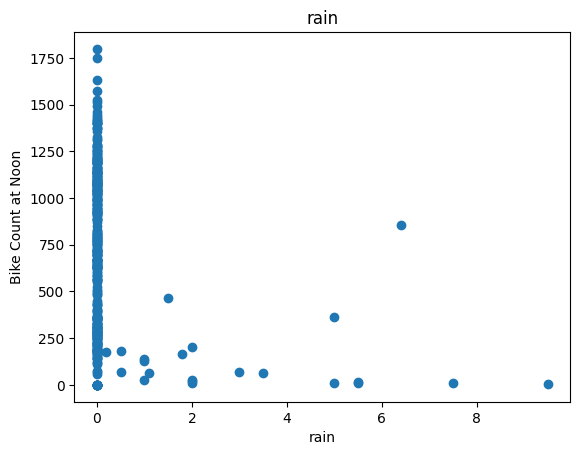

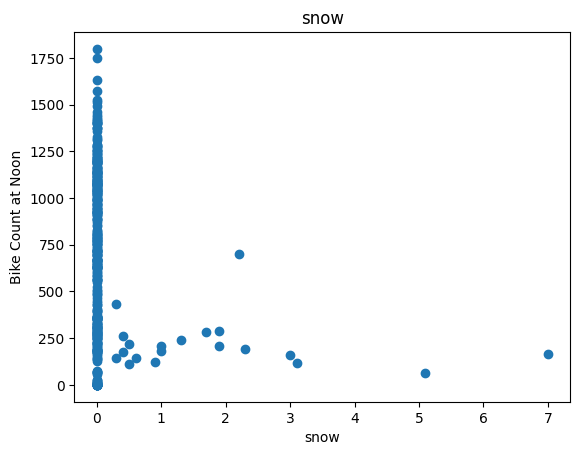

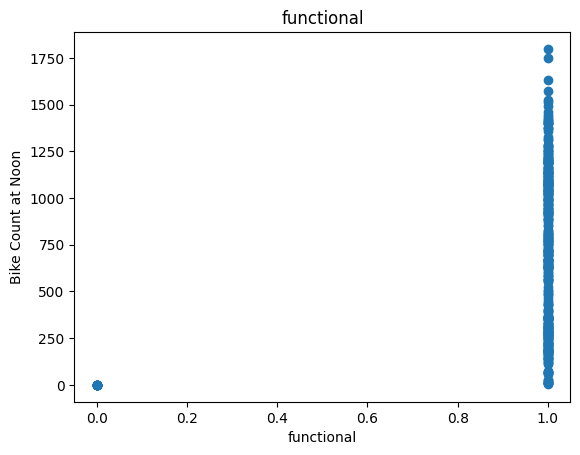

In [6]:
# Plot to see how it effect the bike count
for label in df.columns[1:]:
  plt.scatter(df[label], df['bike_counts'])
  plt.title (label)
  plt.ylabel('Bike Count at Noon')
  plt.xlabel(label)

  plt.show()


In [7]:
df = df.drop(['wind', 'visibility', 'functional'], axis = 1)

In [8]:
df.head()

,bike_counts,temp,humidity,dew_pt_temp,rediation,rain,snow
12,449,1.7,23,-17.2,1.11,0.0,0.0
36,479,4.3,41,-7.8,1.09,0.0,0.0
60,333,5.8,85,3.4,0.43,0.0,0.0
84,393,-0.3,38,-12.9,1.11,0.0,0.0
108,321,-2.3,25,-19.7,0.00,0.0,0.0


# Train, Valid, Test

In [9]:
train, val, test = np.split(df.sample(frac=1), [int (0.6*len(df)), int(0.8*len(df))])

In [10]:
def get_xy(dataframe, y_label, x_labels=None):
    dataframe = copy.deepcopy(dataframe)
    if not x_labels:
        X = dataframe[[c for c in dataframe.columns if c != y_label]].values
    else:
        if len(x_labels) == 1:
            X = dataframe[x_labels[0]].values.reshape(-1, 1)
        else:
            X = dataframe[x_labels].values

    y = dataframe[y_label].values.reshape(-1, 1)
    data = np.hstack((X, y))

    return data, X, y

In [11]:
x_labels_temp = ['temp']  # Replace with your actual list of features
data_train, X_train_temp, y_train_temp = get_xy(train, "bike_counts", x_labels_temp)
data_val, X_val_temp, y_val_temp = get_xy(val, "bike_counts", x_labels_temp)
data_test, X_test_temp, y_test_temp = get_xy(test, "bike_counts", x_labels_temp)

In [12]:
temp_reg = LinearRegression()
temp_reg.fit(X_train_temp, y_train_temp)

print(temp_reg.coef_, temp_reg.intercept_)

[[20.61010086]] [366.32465704]


In [13]:
temp_reg.score(X_test_temp, y_test_temp)

0.22502693314261268

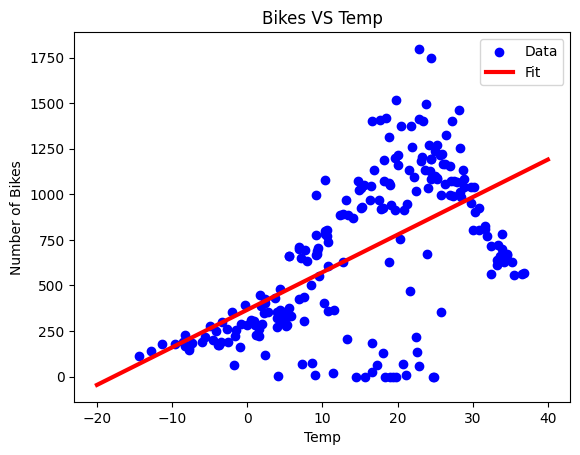

In [14]:
plt.scatter(X_train_temp, y_train_temp, label="Data", color="blue")
x = tf.linspace(-20, 40, 100)
y_pred = temp_reg.predict(x.numpy().reshape(-1, 1))  # Use numpy() to convert tensor to numpy array
plt.plot(x, y_pred, label='Fit', color='red', linewidth=3)
plt.legend()
plt.title('Bikes VS Temp')
plt.ylabel("Number of Bikes")
plt.xlabel("Temp")
plt.show()

# Multilinear Regression

In [15]:
train, val, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])  # Added closing parenthesis
data_train, X_train_all, y_train_all = get_xy(train, "bike_counts", x_labels_temp)
data_val, X_val_all, y_val_all = get_xy(val, "bike_counts", x_labels_temp)
data_test, X_test_all, y_test_all = get_xy(test, "bike_counts", x_labels_temp)


In [16]:
all_reg = LinearRegression()
all_reg.fit(X_train_all, y_train_all )

LinearRegression()

In [17]:
all_reg.score(X_test_all, y_test_all)

0.1696016709220124

# Regression with Neural Net

In [18]:
temp_normalizer = tf.keras.layers.Normalization(input_shape=(1,), axis = None)
temp_normalizer.adapt(X_train_temp.reshape(-1))

In [19]:
temp_nn_model = tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(1)
])

In [20]:
temp_nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1), loss='mean_squared_error')

In [1]:
def plot_loss(history):
  plt.plot(history.history['loss'],label='loss')
  plt.plot(history.history['val_loss'], label ='val_loss')
  plt.set_xlabel('Epoch')
  plt.set_ylabel('MSE')
  plt.legend()
  plt.grid(True)

In [21]:
history = temp_nn_model.fit(
    X_train_temp.reshape(-1), y_train_temp,
    verbose = 0,
    epochs = 1000,
    validation_data = (X_val_temp, y_val_temp)
)

In [1]:
plot_loss

NameError: ignored